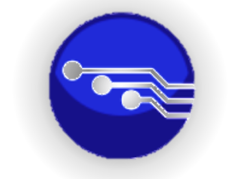

# <center> Unsupervised Learning Methods </center>
## <center> Lecture 2 - Parametric Clustering </center>
### <center> K-Means </center>

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

np.random.seed(1)

### Generate some data:

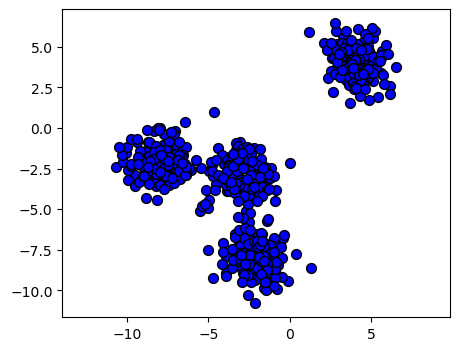

In [2]:
mMu = np.array([[4,   4],
                [-3, -3],
                [-2, -8],
                [-8, -2]])
Ni = 150
mX = np.concatenate([np.random.randn(Ni, 2) + vMu for vMu in mMu])
N  = mX.shape[0]

plt.figure (figsize=(5, 4))
plt.scatter(mX[:,0], mX[:,1], s=50, c='b', edgecolor='k')
plt.axis   ('equal')
plt.show   ()

### A simple implementation of the K-Means algorithm:

#### Step I:
Assume fixed centroids $\left\{ \boldsymbol{\mu}_{k}\right\} $, find
the optimal clusters $\left\{ \mathcal{D}_{k}\right\} $:  
$$\arg\min_{\left\{ \mathcal{D}_{k}\right\} }\sum_{k=1}^{K}\sum_{\boldsymbol{x}_{i}\in\mathcal{D}_{k}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right\Vert _{2}^{2}$$
<center>$\implies \boldsymbol{x}_{i}\in\mathcal{D}_{s\left(\boldsymbol{x}_{i}\right)}$ where $s\left(\boldsymbol{x}_{i}\right)=\arg\min_{k}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right\Vert _{2}^{2}$</center>

#### Step II:
Assume fixed clusters $\left\{ \mathcal{D}_{k}\right\} $, find the
optimal centroids $\left\{ \boldsymbol{\mu}_{k}\right\} $.
$$\arg\min_{\left\{ \boldsymbol{\mu}_{k}\right\} }\sum_{k=1}^{K}\sum_{\boldsymbol{x}_{i}\in\mathcal{D}_{k}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{\mu}_{k}\right\Vert _{2}^{2}$$
$$\implies\boldsymbol{\mu}_{k}=\frac{1}{\left|\mathcal{D}_{k}\right|}\sum_{\boldsymbol{x}_{i}\in\mathcal{D}_{k}}\boldsymbol{x}_{i}$$
#### Repeat until convergence.

In [3]:
from scipy.spatial.distance import cdist

def KMeans(mX, mMu0):
    #-- mX  .shape = (N, d)
    #-- mMu0.shape = (K, d)
    
    K       = mMu0.shape[0]
    lMu     = [mMu0]
    numIter = 20
    mMui    = mMu0 * np.nan
    
    for ii in range(numIter):

        #-- Step 1, assign clusters:
        mD   = cdist(mX, lMu[-1])    #-- mD  .shape = (N, N)
        vIdx = np.argmin(mD, axis=1) #-- vIdx.shape = (N,)

        #-- Step 2, compute clusters means
        for kk in range(K):
            mMui[kk,:] = np.mean(mX[vIdx == kk], axis=0)
        
        lMu.append(mMui.copy())
    
    return lMu #-- in practice, we only need the last one: lMu[-1]

### Apply the algorithm:

In [4]:
mMu0 = mX[[151, 152, 153, 154],:] #-- initial means

lMu  = KMeans(mX, mMu0)

### Plot function:

In [5]:
from scipy.spatial import Voronoi, voronoi_plot_2d

def PlotKMeans(lMu, iteration):
    mMu  = lMu[iteration]
    mD   = cdist    (mX, mMu)
    vIdx = np.argmin(mD, axis=1)
    vor  = Voronoi  (mMu)
    
    _, ax = plt.subplots(figsize=(5, 4))
    voronoi_plot_2d(vor, ax=ax, show_points=False, line_width=2, show_vertices=False)
    plt.scatter    (mX [:,0], mX [:,1], s=50, c=vIdx, edgecolor='k')
    plt.plot       (mMu[:,0], mMu[:,1], '.r', markersize=20)
    plt.axis       ('equal')
    plt.title      ('Iteration = ' + str(iteration))
    plt.axis       ([-12, 8, -12, 8])

In [6]:
from ipywidgets import interact, IntSlider, Layout

PlotAux    = lambda iteration: PlotKMeans(lMu, iteration)
iterSlider = IntSlider(min=0, max=10, step=1, value=0, layout=Layout(width='80%'))
interact(PlotAux, iteration=iterSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='iteration', layout=Layout(width='80%'), max=10), Output(…

### Apply the algorithm with a different initial clusters:

In [7]:
mMu0 = mX[[1, 152, 153, 3],:] #-- initial means
lMu  = KMeans(mX, mMu0)

In [8]:
PlotAux    = lambda iteration: PlotKMeans(lMu, iteration)
iterSlider = IntSlider(min=0, max=20, step=1, value=0, layout=Layout(width='80%'))
interact(PlotAux, iteration=iterSlider)
plt.show()

interactive(children=(IntSlider(value=0, description='iteration', layout=Layout(width='80%'), max=20), Output(…

### Sk-learn implementation:
To obtain stable results:
* Multiple initialization `n_init`  
* Smart initialization `init` (kmean++)

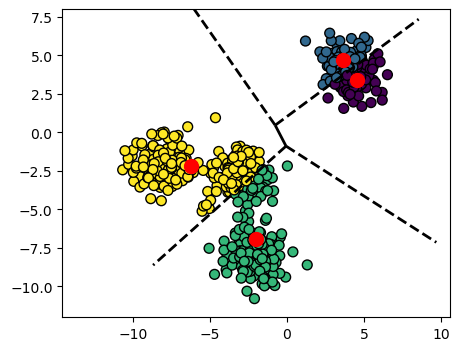

In [9]:
from sklearn.cluster import KMeans

K       = 4
oKMeans = KMeans(n_clusters=K, n_init=1, init='random').fit(mX)
# oKMeans = KMeans(n_clusters=K).fit(mX) #-- use default for stable results
vIdx    = oKMeans.predict(mX)
mMu     = oKMeans.cluster_centers_
vor     = Voronoi(mMu)

_, ax = plt.subplots(figsize=(5, 4))
voronoi_plot_2d(vor, ax=ax, show_points=False, line_width=2, show_vertices=False)
plt.scatter    (mX [:,0], mX [:,1], s=50, c=vIdx, edgecolor='k')
plt.plot       (mMu[:,0], mMu[:,1], '.r', markersize=20)
plt.axis       ('equal')
plt.axis       ([-12, 8, -12, 8])
plt.show       ()

### HW: Super-pixels with K-Menas

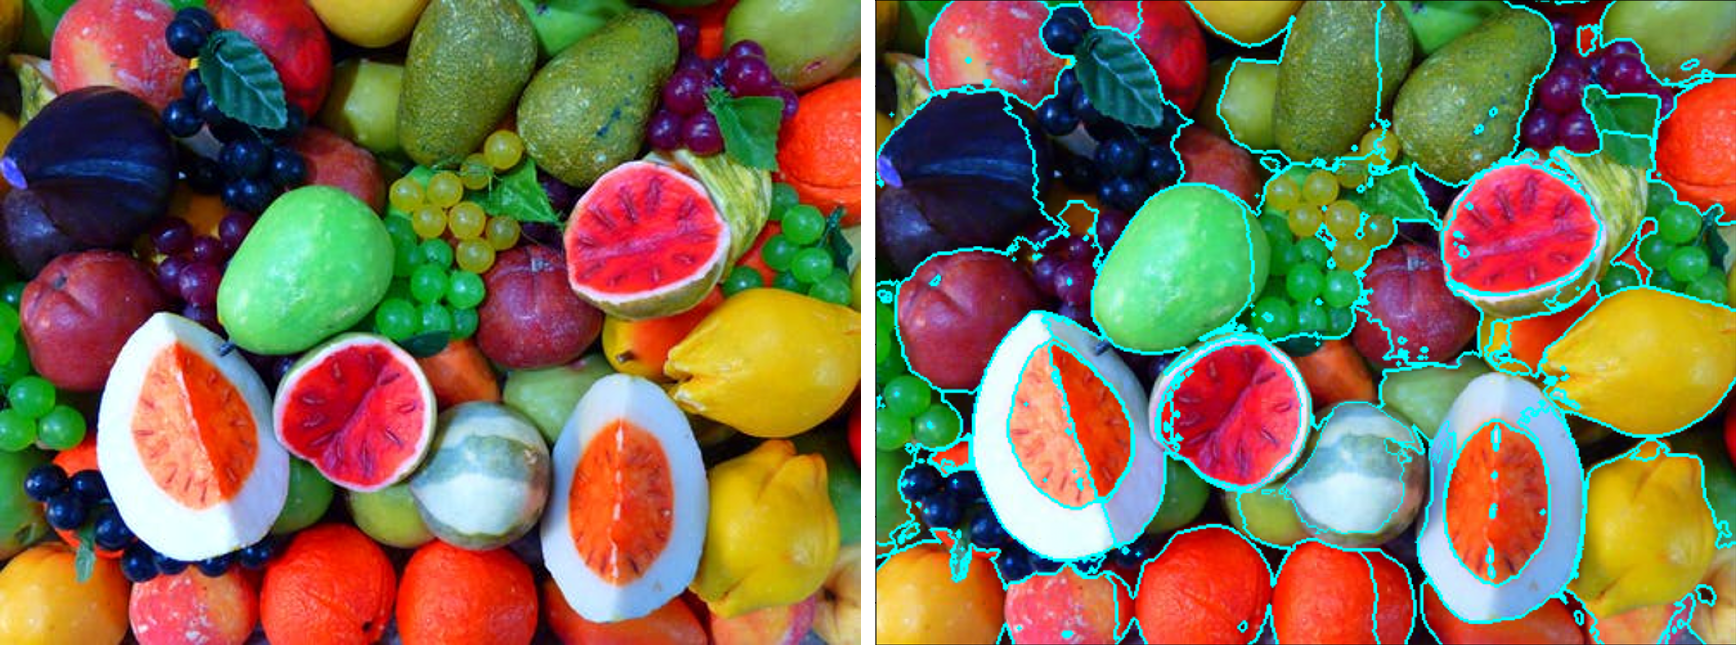